In [ ]:
# Selecting best model from two using corss validation and implementing end to end

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib

In [17]:
read_file = 'Purchased_Dataset.csv'
Target_var = 'Purchased'

In [35]:
df = pd.read_csv(read_file)
df.drop('Gender', axis =1, inplace= True)
df




y = df[Target_var]

x = df.loc[:, df.columns != Target_var]
x

,User ID,Age,EstimatedSalary
0,15624510,19,19000
1,15810944,35,20000
2,15668575,26,43000
3,15603246,27,57000
4,15804002,19,76000
...,...,...,...
395,15691863,46,41000
396,15706071,51,23000
397,15654296,50,20000
398,15755018,36,33000


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(Target_var,axis=1))
scaled_features = scaler.transform(df.drop(Target_var,axis=1))
scaled_features

array([[-0.93657932, -1.78179743, -1.49004624],
       [ 1.66838653, -0.25358736, -1.46068138],
       [-0.32087714, -1.11320552, -0.78528968],
       ...,
       [-0.52039175,  1.17910958, -1.46068138],
       [ 0.88695546, -0.15807423, -1.07893824],
       [-1.36231017,  1.08359645, -0.99084367]])

In [4]:
# Random state as it changes our results keep varying and there is no one fixed accuracy for our model and here is where we use Cross validation

In [5]:
# Random state set to 5
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =5)
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.77

In [6]:
x_train.head()

,Age,EstimatedSalary
24,46,23000
33,28,44000
396,51,23000
273,39,106000
246,35,50000


In [7]:
# Random State set to 7

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =7)
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.77

In [9]:
# Since we are trying to check which model performs better, we are using Cross-validation on whole dataset
# While tuning your model apply only on Training data

from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, x, y, cv=10, scoring ='accuracy').mean())

0.7925


In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print (cross_val_score(logreg, x, y, cv=10, scoring = 'accuracy').mean())

0.6425000000000001


In [11]:
# By applying k-fold Cross validation we found knn works better on our dataset

# Lets try out on Stratified cross validation just in case if the data is imbalanced and if right proportion of Target class is not passed to all the folds

In [13]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= 10)

from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, x, y, cv=skf, scoring ='accuracy').mean())

0.7925


In [14]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits= 10)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, x, y, cv=skf, scoring ='accuracy').mean())

0.6425000000000001


In [38]:
# Lets apply KNN end to end\

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df[Target_var],
                                                    test_size=0.30)

In [42]:
# Use Elbow Method and pick right K value ans this is based on Error rate

In [43]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

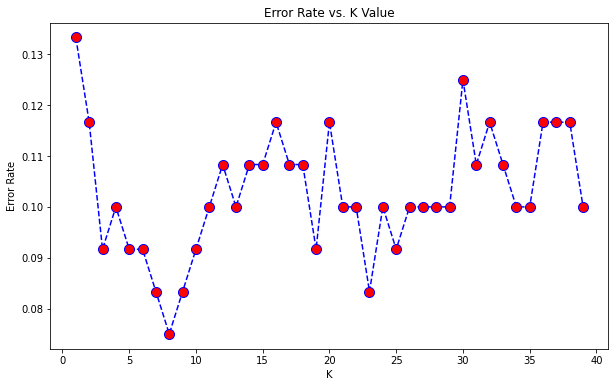

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
error_rate_df = pd.DataFrame(error_rate)
error_rate_df
error_rate_df.index = np.arange(1, len(error_rate_df) + 1)
error_rate_df.columns = ['Error_Rate']
error_rate_df

,Error_Rate
1,0.133333
2,0.116667
3,0.091667
4,0.100000
5,0.091667
6,0.091667
7,0.083333
8,0.075000
9,0.083333
10,0.091667


In [53]:
error_rate_df['Error_Rate'].nsmallest(9).index[1]

7

In [56]:
neighbor_number = error_rate_df.Error_Rate.sort_values().head(2).index[1]

In [57]:
neighbor_number

23

In [60]:
# NOW WITH K=23
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=neighbor_number)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={0}'.format(neighbor_number))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[78  4]
 [ 6 32]]


              precision    recall  f1-score   support

           0       0.93      0.95      0.94        82
           1       0.89      0.84      0.86        38

    accuracy                           0.92       120
   macro avg       0.91      0.90      0.90       120
weighted avg       0.92      0.92      0.92       120



0.7250000000000001
WITH K=23


[[69  4]
 [12 35]]


              precision    recall  f1-score   support

           0       0.85      0.95      0.90        73
           1       0.90      0.74      0.81        47

    accuracy                           0.87       120
   macro avg       0.87      0.84      0.86       120
weighted avg       0.87      0.87      0.86       120

Output is [0]


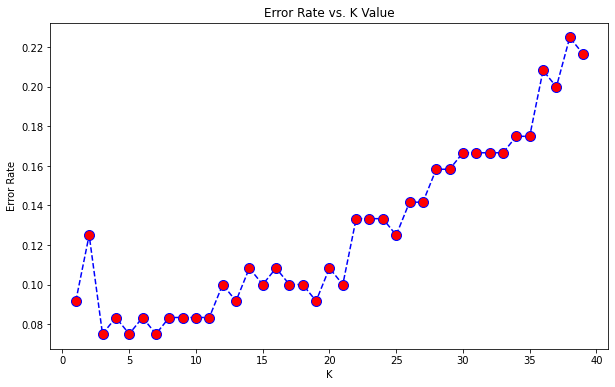

In [71]:

read_file = 'Purchased_Dataset.csv'
Target_var = 'Purchased'

df = pd.read_csv(read_file)
df.drop('Gender', axis =1, inplace= True)

y = df[Target_var]

x = df.loc[:, df.columns != Target_var]
x
# Importing the libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(Target_var,axis=1))
scaled_features = scaler.transform(df.drop(Target_var,axis=1))
scaled_features

# Random state set to 5
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =5)
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.accuracy_score(y_test,y_pred)



# Since we are trying to check which model performs better, we are using Cross-validation on whole dataset
# While tuning your model apply only on Training data

from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=4)
print(cross_val_score(knnclassifier, x, y, cv=10, scoring ='accuracy').mean())




from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df[Target_var],
                                                    test_size=0.30)


error_rate = []

# Will take some time
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

neighbor_number = error_rate_df.Error_Rate.sort_values().head(2).index[1]

# NOW WITH K=23
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=neighbor_number)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K={0}'.format(neighbor_number))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

output = knn.predict(scaler.transform(np.array([[10001, 25, 100000]])))
print('Output is {0}'.format(output))

In [ ]:
# VS Code

from flask import Flask, request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import json
import sklearn
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import requests

app = Flask(__name__)

@app.route('/Purchased', methods = ['POST']) # / means you are connecting to the homepage of that website For eg.www.google.com/

# A decorator will always has to act on function or method
def home():

    USERID =  request.args.get('USERID', type = int)
    Age =request.args.get('Age', type = int)
    EstimatedSalary = request.args.get('EstimatedSalary', type = int)
    

    read_file = 'Purchased_Dataset.csv'
    Target_var = 'Purchased'

    df = pd.read_csv(read_file)
    df.drop('Gender', axis =1, inplace= True)
    df




    y = df[Target_var]

    x = df.loc[:, df.columns != Target_var]
    x
    # Importing the libraries
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaler.fit(df.drop(Target_var,axis=1))
    scaled_features = scaler.transform(df.drop(Target_var,axis=1))
    scaled_features

    # Random state set to 5
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn import metrics
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =5)
    knnclassifier = KNeighborsClassifier(n_neighbors=5)
    knnclassifier.fit(x_train,y_train)
    y_pred = knnclassifier.predict(x_test)
    metrics.accuracy_score(y_test,y_pred)



    # Since we are trying to check which model performs better, we are using Cross-validation on whole dataset
    # While tuning your model apply only on Training data

    from sklearn.model_selection import cross_val_score
    knnclassifier = KNeighborsClassifier(n_neighbors=4)
    print(cross_val_score(knnclassifier, x, y, cv=10, scoring ='accuracy').mean())




    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    X_train, X_test, y_train, y_test = train_test_split(scaled_features,df[Target_var],
                                                        test_size=0.30)


    error_rate = []

    # Will take some time
    for i in range(1,40):

        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))



    plt.figure(figsize=(10,6))
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')

    error_rate_df = pd.DataFrame(error_rate)
    error_rate_df
    error_rate_df.index = np.arange(1, len(error_rate_df) + 1)
    error_rate_df.columns = ['Error_Rate']
    error_rate_df


    neighbor_number = error_rate_df.Error_Rate.sort_values().head(2).index[1]

    # NOW WITH K=23
    from sklearn.metrics import classification_report,confusion_matrix
    knn = KNeighborsClassifier(n_neighbors=neighbor_number)

    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)

    print('WITH K={0}'.format(neighbor_number))
    print('\n')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print(classification_report(y_test,pred))




    output = knn.predict(scaler.transform(np.array([[USERID, Age, EstimatedSalary]])))
    
    
    return "The prediction from GCP is {}".format(output)  


if __name__ == "__main__":
    app.run(port = 7004, debug=True)